## TASK 1 - Blob detection
Group Number: 14

### 1. Data import and preparation

Read an input image from your local directory as grayscale and normalize the values between 0 and 1.

In [294]:
%load_ext autoreload
%autoreload 1
%aimport filters, utils
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
import numpy as np
import filters
import utils
import cv2

# Adjust size of image plot here
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 150

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [295]:
#student_code start

img = cv2.imread("data/butterfly.jpg", cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32) / 255.0

#student_code end

### 2. Scale Space Creation

Generate the image pyramid using ***get_log_pyramid(..)*** in _filters.py_. Check your results with ***utils.show_plot(..)***

***Submission:*** Save the *third level* of the image scale space of the butterfly as **task1_filtered.png** using ***utils.show_plot(..)***.


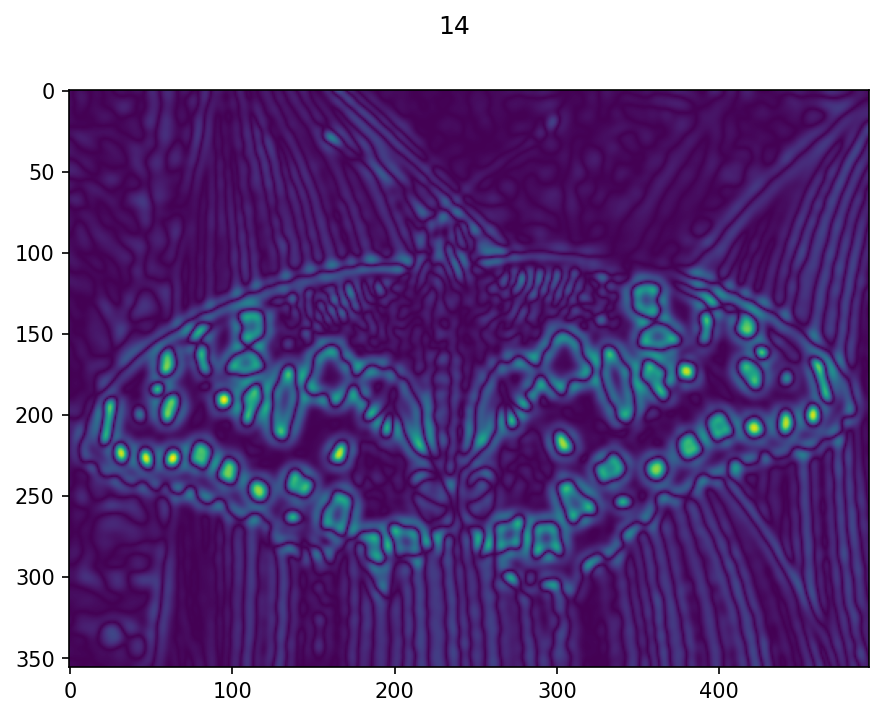

In [296]:
sigma = 2
k = 1.3
levels = 10

#student_code start

scale_space, all_sigmas = filters.get_log_pyramid(img, sigma, k, levels)
utils.show_plot(scale_space[:,:,2], "14", "task1_filtered")

#student_code end

### 2. Blob detection

Perform the first step of the non-maximum suppression by setting the values in the scale space below a certain threshold to zero. Then, look for maxima in a defined local neighbourhood, in this case: the 26-connection. ***skimage.feature.peak_local_max(..)*** is useful to obtain local maxima. Complete method ***utils.show_blobs(..)*** and plot the blobs.


***Submission:*** Save the image including the blobs as **task1_blobs_full.png** (threshold around 0.3).

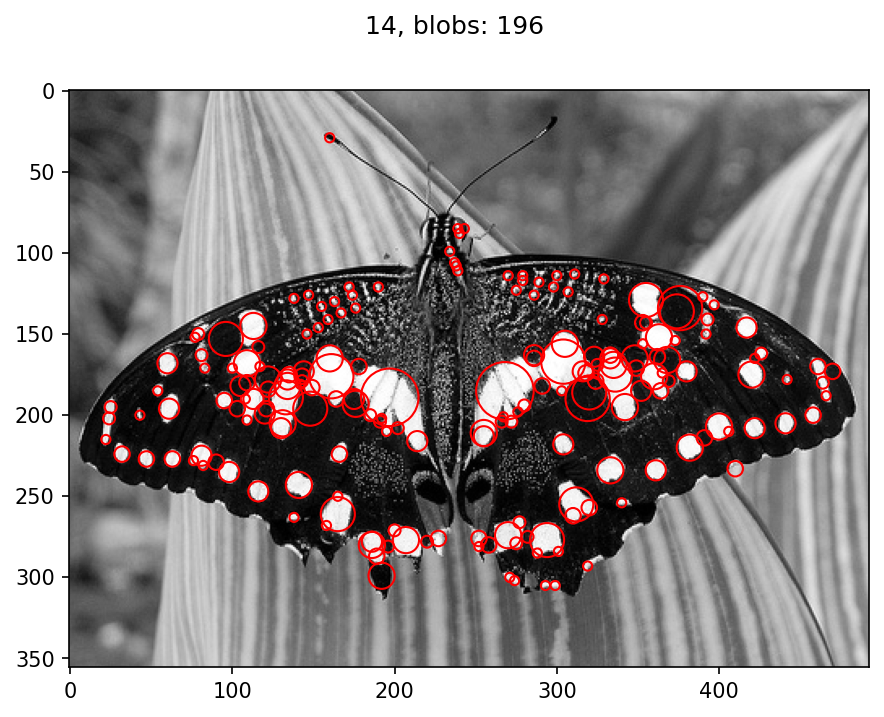

In [297]:
thres = 0.3

#student_code start

from skimage.feature import peak_local_max

scale_space_thr = scale_space.copy()

scale_space_thr[scale_space_thr < thres] = 0

# find local maxima in 3D (row, col, level)
foot = np.ones((3, 3, 3), dtype=bool)
peaks = peak_local_max(
    scale_space_thr,
    footprint=foot,
    threshold_abs=thres,
    exclude_border=False
)

utils.show_blobs(img, peaks, all_sigmas, "14", name="task1_blobs_full")

#student_code end


### 3. Evaluation 

Apply the process to a half-sized version of the input image. Plot your results as well with ***utils.show_blobs(..)***.

_***HINT:***_
_cv2.resize(..)_


***Submission:*** Save the result as **task1_blobs_half.png**.

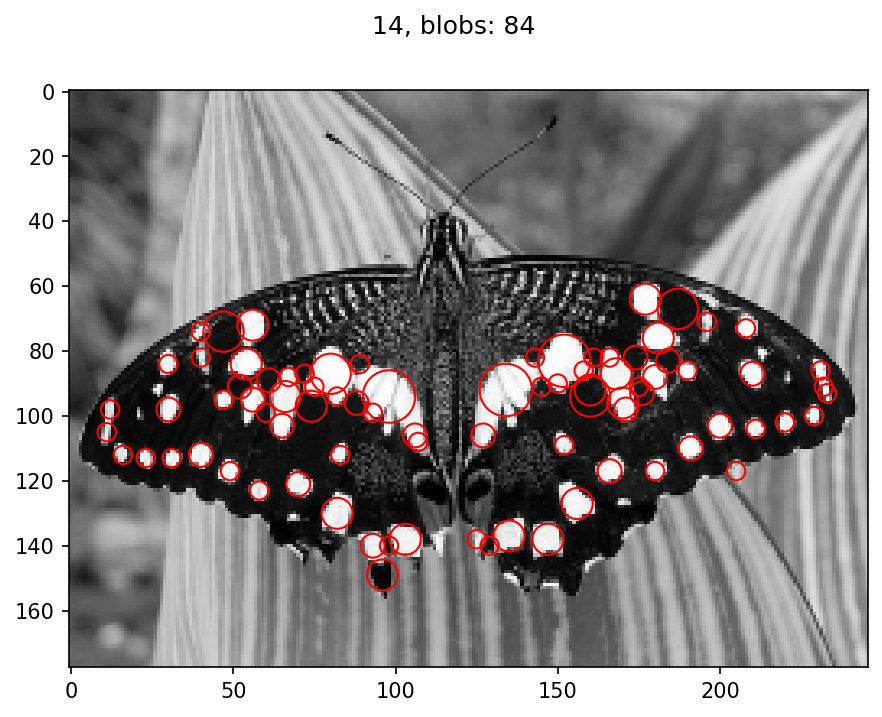

In [298]:
#student_code start

img_half = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

scale_space_half, all_sigmas_half = filters.get_log_pyramid(img_half, sigma, k, levels)

scale_space_thr_half = scale_space_half.copy()
scale_space_thr_half[scale_space_thr_half < thres] = 0

# Blob detection
peaks_half = peak_local_max(scale_space_thr_half, footprint=np.ones((3, 3, 3), dtype=bool), threshold_abs=thres, exclude_border=False)

# Plot and save result
utils.show_blobs(img_half, peaks_half, all_sigmas_half, group_no="14", name="task1_blobs_half")

#student_code end

*** 
#### Taking a close look at the detected blobs on different image scales, is the method able to find blobs in a scale-invariant way? What could be reasons for observed errors or inaccurately detected blobs? 

Yes, the method is mostly scale-invariant, it can detect blobs of different sizes for different image scales. However, some blobs may be inaccurately detected because of limited scale levels, threshold choice, noise, edge responses, or image resizing effects.

#### 3.1 LoG Response

Pick a detected keypoint and plot the response of the LoG for all scales in both image versions. The outcome should be a 2D plot where the x-axis represents the scale of the filter and the y-axis the filter response at the selected keypoint position. 

_***HINT:***_
_plt.plot(..)_

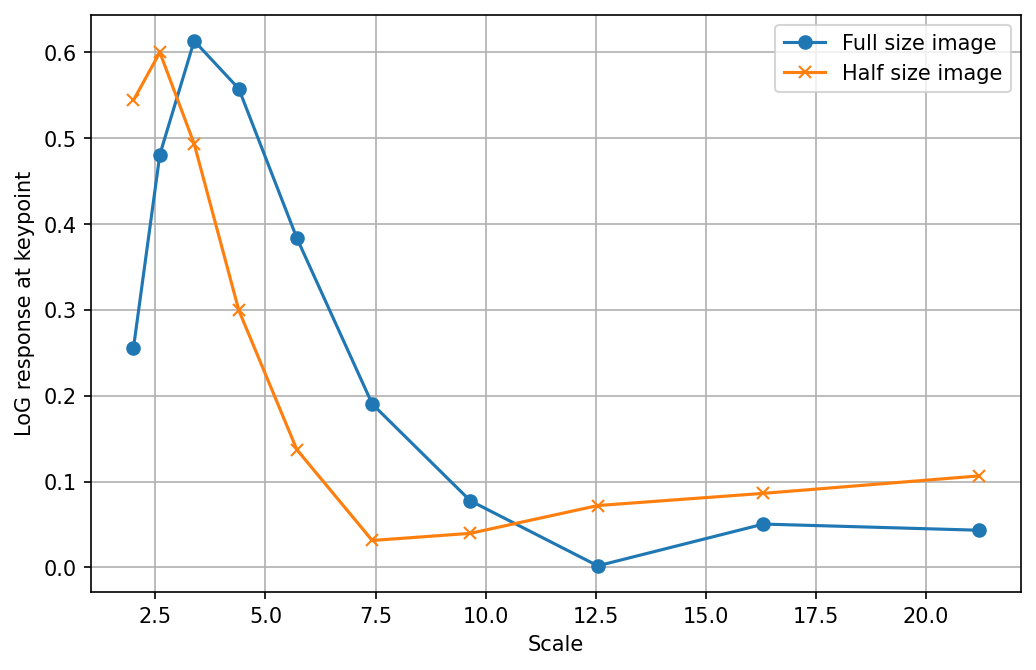

In [299]:
#student_code start

# Pick keypoint and get LoG responses across all scales from full-size image
keypoint = peaks[0]
row, col, _ = keypoint
responses_full = scale_space[row, col, :]
scales_full = all_sigmas

# Same for Half-size image
keypoint_half = peaks_half[0]
row_h, col_h, _ = keypoint_half
responses_half = scale_space_half[row_h, col_h, :]
scales_half = all_sigmas_half

# Plot
plt.figure(figsize=(8, 5))
plt.plot(scales_full, responses_full, marker='o', label='Full size image')
plt.plot(scales_half, responses_half, marker='x', label='Half size image')

plt.xlabel('Scale')
plt.ylabel('LoG response at keypoint')
plt.legend()
plt.grid(True)
plt.show()

#student_code end

*** 
#### Describe and explain the difference between the two LoG response curves.

In the full-size image, blobs are physically larger, so the peak of the LoG response appears at larger scales than the peak of the half-sized image where the blobs are smaller. So the full-size image matches blobs at larger scales better and the half-size image at smaller scales, indicating, that the method adapts to blob size and is scale-invariant.

#### 3.2 Own Image

Import an image of your choice and apply the process once again. 


***Submission:*** Save the image including blobs with ***utils.show_blobs(..)*** as: **task1_blobs_own.png**

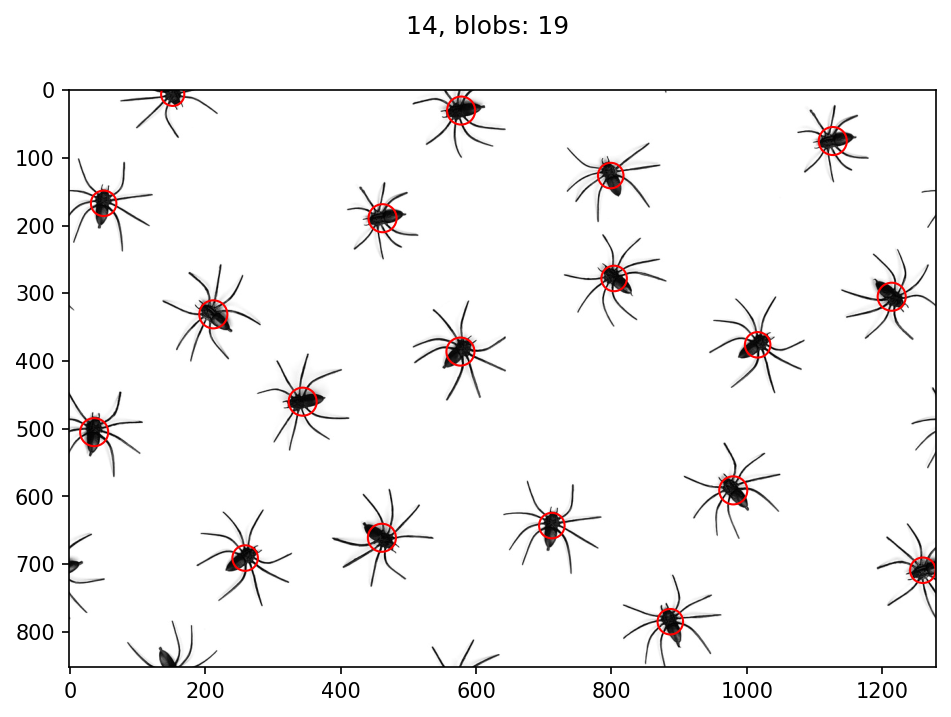

In [300]:
#student_code start
sigma = 10
k = 1.1
levels = 10
thres = 0.4

img_own = cv2.imread("data/spiders.jpg", cv2.IMREAD_GRAYSCALE)
img_own = img_own.astype(np.float32) / 255.0

scale_space_own, all_sigmas_own = filters.get_log_pyramid(img_own, sigma, k, levels)
scale_space_own_thr = scale_space_own.copy()

scale_space_own_thr[scale_space_own_thr < thres] = 0

peaks_own = peak_local_max(
    scale_space_own_thr,
    footprint=np.ones((3, 3, 3), dtype=bool),
    threshold_abs=thres,
    exclude_border=False
)

utils.show_blobs(img_own, peaks_own, all_sigmas_own, "14", name="task1_blobs_own")
#student_code end